## **演练0501：权重初始化**

### **提出问题**  
观察下列神经网络：  
![](../images/150101.png)  
以及对应的反向回归梯度流：  
![](../images/150102.png)  
考虑$\Theta^{(1)}$，$\Theta^{(2)}$ 和$\Theta^{(3)}$ 要分别如何初始化？

### **全都初始化为相同的实数**  
预备知识：
* 对于矩阵$W$及列向量$x$，执行矩阵向量乘积运算：$y=Wx$，得到向量$y$
  * 如果$W$所有元素值都相同，则$y$中各个元素值必然相同
  * 如果$W$中每行元素值都相同(行中各个列的值可能不同)，则$y$中各个元素的值也相同。例如：  
  $\left(
  \begin{matrix}
    1 & 2 & 3 & 4 \\
    1 & 2 & 3 & 4 \\
    1 & 2 & 3 & 4
  \end{matrix}
  \right) * 
  \left(
  \begin{matrix}
    10 \\
    20 \\
    30 \\
    40
  \end{matrix}
  \right)=
  \left(
  \begin{matrix}
    300 \\
    300 \\
    300
  \end{matrix}
  \right)$
* 对于$N$维列向量$x$和$M$维行向量$y$，其向量乘积结果$z=xy$是一个$(N,M)$矩阵：
  * 如果$y$向量的每个元素值都相同，则$z$中每列元素值都相同(或者说，同一行内，各列的元素值都相同，但不同行的值可能不同)
  * 如果$x$向量的每个元素值都相同，则$z$中每行元素值都相同(或者说，同一列内，各行的元素值都相同，但不同列的值可能不同)

考虑一个样本$x$  
* 第1轮正向计算，$a^{(2)}$ 中所有元素都相同，$a^{(3)}$ 中所有元素都相同，$a^{(4)}$ 中所有元素也都相同；$z^{(1)}$，$z^{(2)}$，$z^{(3)}$ 中的元素也分别相同
* 第1轮反向传播：
 * $\delta^{(4)}$：各元素可能不同
 * $\dfrac{\partial L}{\partial a^{(3)}}=(\Theta^{(3)})^T \delta^{(4)}$：所有元素都相同。$\dfrac{\partial L}{\partial \Theta^{(3)}}=\delta^{(4)}(a^{(2)})^T$：每列元素值都相同。$\delta^{(3)}=(\Theta^{(3)})^T\delta^{(4)}*g'(z^{(3)})$：所有元素都相同。
 * $\dfrac{\partial L}{\partial a^{(2)}}$：所有元素都相同。$\dfrac{\partial L}{\partial \Theta ^ {(2)}}$：所有元素都相同。$\delta^{(2)}$：所有元素都相同。
 * $\dfrac{\partial L}{\partial \Theta ^ {(1)}}=\delta^{(2)}(a^{(1)})^T$：每行元素值都相同
 * 第一轮反向传播后的结果是：
   * $\Theta^{(1)}$：每行数据都相同(虽然一行中，各个列的元素不一定相同)
   * $\Theta^{(2)}$：所有数据都相同
   * $\Theta^{(3)}$：每列数据都相同
* 第2轮正向计算
 * $z^{(2)}$：所有元素都相同；$a^{(2)}$：所有元素都相同
 * $z^{(3)}$：所有元素都相同；$a^{(3)}$：所有元素都相同
 * $z^{(4)}$：各元素值可能不同；$a^{(4)}$：各元素值可能不同
* 第2轮反向计算
 * $\delta^{(4)}$：各元素可能不同
 * $\dfrac{\partial L}{\partial a^{(3)}}=(\Theta^{(3)})^T \delta^{(4)}$：所有元素都相同(注意，$\Theta^{(3)}$是每列元素相同，而$(\Theta^{(3)})^T$则正好是每行元素相同)。$\dfrac{\partial L}{\partial \Theta^{(3)}}$：每列元素值都相同。$\delta^{(3)}$：所有元素都相同。
 * $\dfrac{\partial L}{\partial a^{(2)}}$：所有元素都相同。$\dfrac{\partial L}{\partial \Theta^{(2)}}$：所有元素都相同。$\delta^{(2)}$：所有元素都相同。
 * $\dfrac{\partial L}{\partial \Theta^{(1)}}$：每行元素值都相同
* 可以得出规律，每轮计算后得到：
 * $a^{(2)}$：所有元素都相同
 * $a^{(3)}$：所有元素都相同。
* 推广可知：隐藏层每层都只相当于有1个神经元。因此，不能全部初始化为相同的实数！

### **案例1：观察权重初始化为相同实数时的神经网络传播效果**

In [1]:
''' 观察权重初始化为相同实数时的神经网络传播效果 '''
import numpy as np

def make_vectorized_labels(Y, classifies_count):
    rows_count = len(Y)
    vec_y = np.zeros((rows_count, classifies_count))
    for i, v in enumerate(Y):
        vec_y[i, v] = 1
    return vec_y

def sigmoid(X):
    return 1.0 / (1.0 + np.exp(-X))

def reshape_theta(THETA_1, THETA_2, THETA_3):
    THETA_ALL = THETA_1.reshape(1, -1)
    THETA_ALL = np.append(THETA_ALL, THETA_2.reshape(1, -1))
    THETA_ALL = np.append(THETA_ALL, THETA_3.reshape(1, -1))
    return THETA_ALL

def extract_theta(THETA_ALL):
    THETA_1 = THETA_ALL[0:h1_count*(input_count)].reshape(h1_count, input_count)
    THETA_2 = THETA_ALL[h1_count*(input_count):(h1_count*(input_count) + h2_count*(h1_count))].reshape(h2_count, h1_count)
    THETA_3 = THETA_ALL[-output_count*(h2_count):].reshape(output_count, h2_count)
    return (THETA_1, THETA_2, THETA_3)

def forward(THETA_1, THETA_2, THETA_3, X):
    A_1 = X
    z_2 = np.dot(A_1, THETA_1.T)
    A_2 = sigmoid(z_2)
    z_3 = np.dot(A_2, THETA_2.T)
    A_3 = sigmoid(z_3)
    z_4 = np.dot(A_3, THETA_3.T)
    A_4 = sigmoid(z_4)
    print('A_2:', A_2)
    print('A_3:', A_3)
    print('A_4:', A_4)
    return A_4

def cost(THETA_ALL, X, Y, lmd = 0):
    THETA_1, THETA_2, THETA_3 = extract_theta(THETA_ALL)
    A_4 = forward(THETA_1, THETA_2, THETA_3, X)
    baseline = 1e-5
    A_4[np.where(A_4<baseline)] = baseline
    A_4[np.where(A_4>1-baseline)] = 1-baseline
    cost1 = -np.sum(Y * np.log(A_4)) - np.sum((1 - Y) * np.log(1 - A_4))         
    cost2 = np.sum(np.square(THETA_1)) + np.sum(np.square(THETA_2)) + np.sum(np.square(THETA_3))
    cost_all = (cost1 + lmd * cost2 / 2) / len(X)
    return cost_all

def grad(THETA_ALL, X, Y, lmd = 0):
    THETA_1, THETA_2, THETA_3 = extract_theta(THETA_ALL)
    A_1 = X
    z_2 = np.dot(A_1, THETA_1.T)
    A_2 = sigmoid(z_2)
    z_3 = np.dot(A_2, THETA_2.T)
    A_3 = sigmoid(z_3)
    z_4 = np.dot(A_3, THETA_3.T)
    A_4 = sigmoid(z_4)
    d4 = A_4 - Y
    d3 = np.dot(d4, THETA_3) * z_3 * (1 - z_3)
    d2 = np.dot(d3, THETA_2) * z_2 * (1 - z_2)
    M = len(X)
    # 暂不考虑惩罚项
    DELTA_3 = np.dot(d4.T, A_3)/M
    DELTA_2 = np.dot(d3.T, A_2)/M
    DELTA_1 = np.dot(d2.T, A_1)/M
    GRAD_ALL = reshape_theta(DELTA_1, DELTA_2, DELTA_3)
    return GRAD_ALL

train_samples_count = 1         # 样本数
input_count = 5                 # 5个特征值
h1_count = 4                    # 第1个隐藏层，4个节点
h2_count = 3                    # 第2个隐藏层，3个节点
output_count = 2                # 输出层，2个类别
count = 1

# 初始化样本
x_train = np.random.randn(train_samples_count, input_count)
y_train = np.random.randint(0, output_count, train_samples_count)
y_train = make_vectorized_labels(y_train, output_count)

# 以相同实数初始化权重
INIT_THETA_1 = np.full((h1_count, input_count), 5)
INIT_THETA_2 = np.full((h2_count, h1_count), 5)
INIT_THETA_3 = np.full((output_count, h2_count), 5)
INIT_THETA_ALL = reshape_theta(INIT_THETA_1, INIT_THETA_2, INIT_THETA_3)

lmd = 0.1
alpha = 0.001
THETA_1, THETA_2, THETA_3 = extract_theta(INIT_THETA_ALL)
for i in np.arange(1, 4):           # 仅进行3个循环
    print('第', i, '轮正向计算完成后===================')
    THETA_ALL = reshape_theta(THETA_1, THETA_2, THETA_3)
    c = cost(THETA_ALL, x_train, y_train, lmd)
    dAll = grad(THETA_ALL, x_train, y_train, lmd)
    d1, d2, d3 = extract_theta(dAll)
    THETA_1, THETA_2, THETA_3 = extract_theta(THETA_ALL)
    THETA_1 = THETA_1 - alpha * d1
    THETA_2 = THETA_2 - alpha * d2
    THETA_3 = THETA_3 - alpha * d3
    print('第', i, '轮反向传播完成后===================')
    print('Theta1：', THETA_1)
    print('Theta2：', THETA_2)
    print('Theta3：', THETA_3)

第 1 轮正向计算完成后===================
A_2: [[0.16451659 0.16451659 0.16451659 0.16451659]]
A_3: [[0.96409564 0.96409564 0.96409564]]
A_4: [[0.99999948 0.99999948]]
第 1 轮反向传播完成后===================
Theta1： [[5.26371174 4.69748689 6.50143798 2.77933928 6.54156975]
 [5.26371174 4.69748689 6.50143798 2.77933928 6.54156975]
 [5.26371174 4.69748689 6.50143798 2.77933928 6.54156975]
 [5.26371174 4.69748689 6.50143798 2.77933928 6.54156975]]
Theta2： [[5.00619894 5.00619894 5.00619894 5.00619894]
 [5.00619894 5.00619894 5.00619894 5.00619894]
 [5.00619894 5.00619894 5.00619894 5.00619894]]
Theta3： [[4.9990359 4.9990359 4.9990359]
 [5.        5.        5.       ]]
第 2 轮正向计算完成后===================
A_2: [[0.00347744 0.00347744 0.00347744 0.00347744]]
A_3: [[0.51740174 0.51740174 0.51740174]]
A_4: [[0.99957352 0.99957416]]
第 2 轮反向传播完成后===================
Theta1： [[5.24368648 4.72045857 6.38742455 2.94796772 6.42450887]
 [5.24368648 4.72045857 6.38742455 2.94796772 6.42450887]
 [5.24368648 4.72045857 6.3874

### **初始化为较小的随机数**
* 条件
 * 考虑$N$个样本，使用10个隐藏层神经网络进行前向计算
 * 采用标准正态分布来生成随机数并乘以一个较小的系数(0.01)来初始化各级权重
 * 使用tanh作为激活函数
 * 统计每层节点值的均值和标准差
* 查看问题
 * 每层节点的均值和标准差
    * 输入层，均值：-0.000597，标准差：0.999271
    * 隐藏层1，均值：-0.000213，标准差：0.213266
    * 隐藏层2，均值：0.000033，标准差：0.047405
    * 隐藏层3，均值：-0.000006，标准差：0.010633
    * 隐藏层4，均值：0.000002，标准差：0.002390
    * 隐藏层5，均值：0.000000，标准差：0.000533
    * 隐藏层6，均值：0.000000，标准差：0.000119
    * 隐藏层7，均值：-0.000000，标准差：0.000027
    * 隐藏层8，均值：-0.000000，标准差：0.000006
    * 隐藏层9，均值：0.000000，标准差：0.000001
    * 隐藏层10，均值：-0.000000，标准差：0.000000
 * 图像
    * 均值和标准差：  
![](../images/150103.png)  
    * 各层节点值分布直方图：  
![](../images/150104.png)  
* 结果讨论
 * 前向计算时，第1个隐藏层的节点计算结果也能很好的符合正态分布
 * 但是从第2层开始，各级节点的计算结果的均值越来越趋于0，而标准差也趋于0。这就是说：各级节点值都趋于0。从上面的直方图也可以看出来，后面几个层级几乎所有节点都集中在0附近
 * 如果某层级所有节点值$a$趋于0，从而使得$\dfrac{\partial L}{\partial \Theta}=\delta a^T$ 趋于0，同样导致"梯度消失"
 * 一旦出现梯度消失现象，那就意味着每个计算循环基本没有什么效果，导致计算很难收敛
 * 若使用relu作为激活函数，也有类似的结果
 * 层数越多，后续的层级越容易出现梯度消失

### **案例2：观察采用较小的随机值初始化权重时的问题**

输入层，均值：-0.000638，标准差：0.999410
隐藏层1，均值：-0.000111，标准差：0.213447
隐藏层2，均值：-0.000056，标准差：0.047487
隐藏层3，均值：-0.000016，标准差：0.010634
隐藏层4，均值：-0.000006，标准差：0.002374
隐藏层5，均值：-0.000001，标准差：0.000530
隐藏层6，均值：-0.000000，标准差：0.000118
隐藏层7，均值：0.000000，标准差：0.000027
隐藏层8，均值：0.000000，标准差：0.000006
隐藏层9，均值：0.000000，标准差：0.000001
隐藏层10，均值：-0.000000，标准差：0.000000


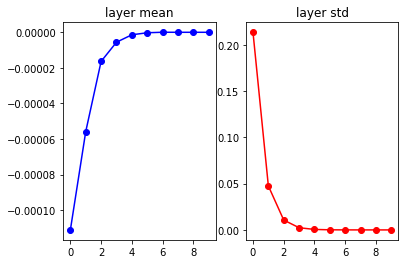

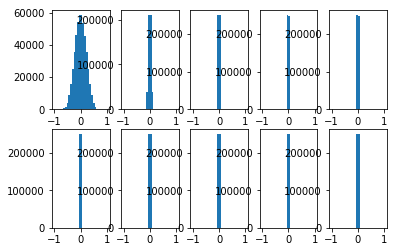

In [2]:
''' 观察采用较小的随机值初始化权重时的问题 '''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 初始化为较小的随机数
def init_W(fan_in, fan_out):
    return np.random.randn(fan_in, fan_out) * 0.01

N = 1000
D = 500
H = 500
L = 10
input = np.random.randn(N, D)       # 1000个样本，500个特征
hidden_layer_sizes = [H] * L        # [500, 500, ... 500] 10个隐藏层，每层500个节点

# 定义relu和tanh两种激活函数
act_func = {
    'relu':lambda x: np.maximum(0, x), 
    'tanh':lambda x: np.tanh(x)
}

activations = ['tanh'] * L       # 默认情况下每层都使用tanh激活函数

hidden_layer_results = []           # 保存各隐藏层的计算结果
for i in range(L):
    X = input if i == 0 else hidden_layer_results[i - 1]
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    # 初始化每该层的权重
    W = init_W(fan_in, fan_out)
    Z = np.dot(X, W)                            # 线性变换
    A = act_func[activations[i]](Z)             # 应用激活函数
    hidden_layer_results.append(A)              # 保存本层计算结果

print('输入层，均值：%f，标准差：%f' % (np.mean(input), np.std(input)))
layer_means = [np.mean(A) for A in hidden_layer_results]          # 各层元素均值
layer_stds = [np.std(A) for A in hidden_layer_results]            # 各层元素标准差
for i in range(L):
    print('隐藏层%d，均值：%f，标准差：%f' % (i + 1, layer_means[i], layer_stds[i]))

plt.figure()
plt.subplot(121)            # 1行2列，第1幅图
plt.plot(np.arange(L), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)            # 1行2列，第2幅图
plt.plot(np.arange(L), layer_stds, 'or-')
plt.title('layer std')

plt.figure()
for i in range(L):
    plt.subplot(2, L/2, i + 1)        # 2行5列，第i+1幅图
    plt.hist(hidden_layer_results[i].ravel(), bins=30, range=(-1.0, 1.0))     # 做出直方图
plt.show()

### **初始化为较大的随机数**
* 条件
 * 考虑$N$个样本，使用10个隐藏层神经网络进行前向计算
 * 采用标准正态分布来生成随机数并乘以一个较大的系数(1.0)来初始化各级权重
 * 使用tanh作为激活函数
 * 统计每层节点值的均值和标准差
* 图像
 * 均值和标准差：  
![](../images/150105.png)  
 * 各层节点值分布直方图：  
![](../images/150106.png)  
* 结果讨论
 * 各层节点均值接近0，而标准差接近1。这说明节点值集中在-1或1附近
 * 回顾：本级节点(设为$a^{(2)}$)值是上级节点(设为$a^{(1)}$)与权重矩阵(设为$W$)进行线性变换，再经过激活函数(设为$g$)而得：  
$ z^{(2)}=Wa^{(1)} $  
$ a^{(2)}=g(z^{(2)}) $  
 * 在反向传播时，假设已经求得：$\dfrac{\partial L}{\partial a^{(2)}}$，如果要计算权重矩阵$W$的梯度$\dfrac{\partial L}{\partial W}$，那么必须先计算$\dfrac{\partial L}{\partial z^{(2)}} $  
$ \dfrac{\partial L}{\partial z^{(2)}}=\dfrac{\partial L}{\partial a^{(2)}} \dfrac{\partial a^{(2)}}{\partial z^{(2)}} $  
$ \dfrac{\partial a^{(2)}}{\partial z^{(2)}}=tanh'(z^{(2)}) $  
 * 从tanh函数的曲线图可以看到，当$a^{(2)}$ 值(图中纵坐标)趋于-1或1时，其针对$z^{(2)}$(图中横坐标)的梯度(曲线斜率)趋于0。这种情况可以叫做"激活值饱和"：  
![](../images/150107.png)  
 * 因此，将会导致权重矩阵的梯度为0，再次造成"梯度消失"
 * 可自行尝试relu激活函数

### **案例3：观察采用较大的随机值初始化权重时的问题**

输入层，均值：-0.002548，标准差：0.998482
隐藏层1，均值：-0.000698，标准差：0.981818
隐藏层2，均值：-0.001319，标准差：0.981909
隐藏层3，均值：-0.000552，标准差：0.981485
隐藏层4，均值：0.002537，标准差：0.981672
隐藏层5，均值：0.003185，标准差：0.981722
隐藏层6，均值：-0.000687，标准差：0.981681
隐藏层7，均值：0.001542，标准差：0.981602
隐藏层8，均值：-0.000798，标准差：0.981836
隐藏层9，均值：0.000538，标准差：0.981769
隐藏层10，均值：0.000936，标准差：0.981829


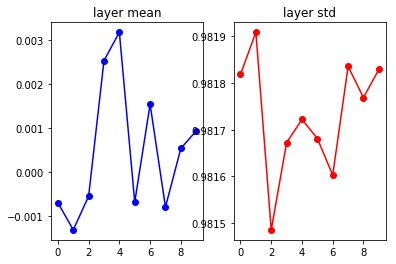

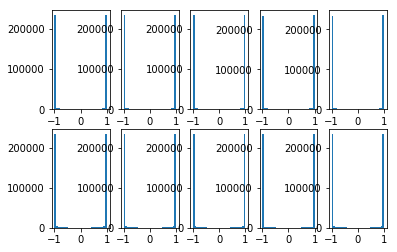

In [3]:
''' 观察采用较大的随机值初始化权重时的问题 '''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 用较大的随机数作初始化
def init_W(fan_in, fan_out):
    return np.random.randn(fan_in, fan_out)

N = 1000
D = 500
H = 500
L = 10
input = np.random.randn(N, D)       # 1000个样本，500个特征
hidden_layer_sizes = [H] * L        # [500, 500, ... 500] 10个隐藏层，每层500个节点

# 定义relu和tanh两种激活函数
act_func = {
    'relu':lambda x: np.maximum(0, x), 
    'tanh':lambda x: np.tanh(x)
}

activations = ['tanh'] * L       # 默认情况下每层都使用tanh激活函数

hidden_layer_results = []           # 保存各隐藏层的计算结果
for i in range(L):
    X = input if i == 0 else hidden_layer_results[i - 1]
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    # 初始化每该层的权重
    W = init_W(fan_in, fan_out)
    Z = np.dot(X, W)                            # 线性变换
    A = act_func[activations[i]](Z)             # 应用激活函数
    hidden_layer_results.append(A)              # 保存本层计算结果

print('输入层，均值：%f，标准差：%f' % (np.mean(input), np.std(input)))
layer_means = [np.mean(A) for A in hidden_layer_results]          # 各层元素均值
layer_stds = [np.std(A) for A in hidden_layer_results]            # 各层元素标准差
for i in range(L):
    print('隐藏层%d，均值：%f，标准差：%f' % (i + 1, layer_means[i], layer_stds[i]))

plt.figure()
plt.subplot(121)            # 1行2列，第1幅图
plt.plot(np.arange(L), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)            # 1行2列，第2幅图
plt.plot(np.arange(L), layer_stds, 'or-')
plt.title('layer std')

plt.figure()
for i in range(L):
    plt.subplot(2, L/2, i + 1)        # 2行5列，第i+1幅图
    plt.hist(hidden_layer_results[i].ravel(), bins=30, range=(-1.0, 1.0))     # 做出直方图
plt.show()

### **Xavier初始化**
* 条件
 * 考虑$N$个样本，使用10个隐藏层神经网络进行前向计算
 * 采用下列公式计算初始权重：<code>np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)</code>
 * 使用tanh作为激活函数
 * 统计每层节点值的均值和标准差
* 图像
 * 均值和标准差：  
![](../images/150108.png)  
 * 各层节点值分布直方图：  
![](../images/150109.png)  
* 结果讨论
 * 可以看到，各层节点值，并不像之前一样几乎全部集中于某个特定数值上，而是有较好的分布效果。从而可以作为一种不错的初始化方法
 * 但是，如果使用relu激活函数，将会看到下列直方图：  
![](../images/150110.png)  
 * 这说明，在relu激活函数下，在后续几层，绝大部分节点值都在0附近。考虑到，relu函数的梯度，在$y=0$附近时就是0。这将导致巨大部分节点值对应的权重梯度都是0，同样产生"梯度消失"

### **案例4：观察Xavier初始化权重时的问题**

输入层，均值：0.000601，标准差：1.001063
隐藏层1，均值：0.399464，标准差：0.585080
隐藏层2，均值：0.288606，标准差：0.418585
隐藏层3，均值：0.209636，标准差：0.310820
隐藏层4，均值：0.143283，标准差：0.217464
隐藏层5，均值：0.109402，标准差：0.154836
隐藏层6，均值：0.076452，标准差：0.111125
隐藏层7，均值：0.052197，标准差：0.079625
隐藏层8，均值：0.034352，标准差：0.052794
隐藏层9，均值：0.023940，标准差：0.034538
隐藏层10，均值：0.018188，标准差：0.025972


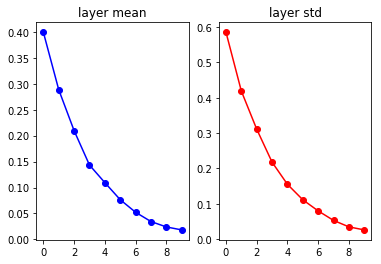

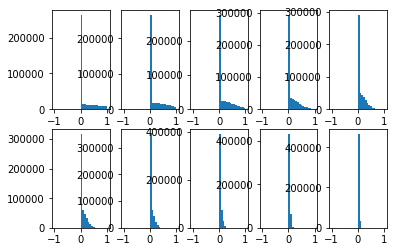

In [4]:
''' 观察Xavier初始化权重时的问题 '''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Xavier初始化
def init_W(fan_in, fan_out):
    return np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)

N = 1000
D = 500
H = 500
L = 10
input = np.random.randn(N, D)       # 1000个样本，500个特征
hidden_layer_sizes = [H] * L        # [500, 500, ... 500] 10个隐藏层，每层500个节点

# 定义relu和tanh两种激活函数
act_func = {
    'relu':lambda x: np.maximum(0, x), 
    'tanh':lambda x: np.tanh(x)
}

activations = ['relu'] * L       # 默认情况下每层都使用tanh激活函数

hidden_layer_results = []           # 保存各隐藏层的计算结果
for i in range(L):
    X = input if i == 0 else hidden_layer_results[i - 1]
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    # 初始化每该层的权重
    W = init_W(fan_in, fan_out)
    Z = np.dot(X, W)                            # 线性变换
    A = act_func[activations[i]](Z)             # 应用激活函数
    hidden_layer_results.append(A)              # 保存本层计算结果

print('输入层，均值：%f，标准差：%f' % (np.mean(input), np.std(input)))
layer_means = [np.mean(A) for A in hidden_layer_results]          # 各层元素均值
layer_stds = [np.std(A) for A in hidden_layer_results]            # 各层元素标准差
for i in range(L):
    print('隐藏层%d，均值：%f，标准差：%f' % (i + 1, layer_means[i], layer_stds[i]))

plt.figure()
plt.subplot(121)            # 1行2列，第1幅图
plt.plot(np.arange(L), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)            # 1行2列，第2幅图
plt.plot(np.arange(L), layer_stds, 'or-')
plt.title('layer std')

plt.figure()
for i in range(L):
    plt.subplot(2, L/2, i + 1)        # 2行5列，第i+1幅图
    plt.hist(hidden_layer_results[i].ravel(), bins=30, range=(-1.0, 1.0))     # 做出直方图
plt.show()

### **He Initialization(何恺明等人提出)**
* 条件
 * 考虑$N$个样本，使用10个隐藏层神经网络进行前向计算
 * 采用下列公式计算初始权重：<code>np.random.randn(fan_in, fan_out) / np.sqrt(fan_in / 2)</code>
 * 使用relu作为激活函数
 * 统计每层节点值的均值和标准差
* 图像  
 * 均值和标准差：  
![](../images/150111.png)  
 * 各层节点值分布直方图：  
![](../images/150112.png)  
* 结果讨论
 * 虽然有大量节点值为0，但是仍有一半值(250000)是非0的
 * 在深度神经网络种，建议可以采用这种初始化的方式

### **案例5：观察He et al初始化权重时的效果**

输入层，均值：0.002635，标准差：1.000974
隐藏层1，均值：0.564563，标准差：0.826454
隐藏层2，均值：0.583953，标准差：0.845205
隐藏层3，均值：0.598292，标准差：0.873426
隐藏层4，均值：0.574935，标准差：0.881276
隐藏层5，均值：0.583059，标准差：0.876086
隐藏层6，均值：0.586834，标准差：0.900249
隐藏层7，均值：0.570090，标准差：0.834793
隐藏层8，均值：0.541843，标准差：0.808501
隐藏层9，均值：0.565042，标准差：0.824310
隐藏层10，均值：0.521064，标准差：0.774438


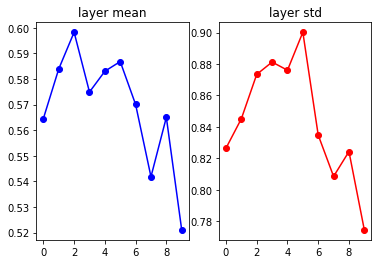

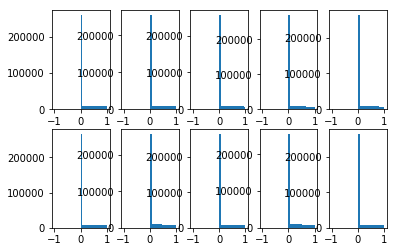

In [5]:
''' 观察He et al初始化权重时的效果 '''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Xavier初始化
def init_W(fan_in, fan_out):
    return np.random.randn(fan_in, fan_out) / np.sqrt(fan_in / 2)

N = 1000
D = 500
H = 500
L = 10
input = np.random.randn(N, D)       # 1000个样本，500个特征
hidden_layer_sizes = [H] * L        # [500, 500, ... 500] 10个隐藏层，每层500个节点

# 定义relu和tanh两种激活函数
act_func = {
    'relu':lambda x: np.maximum(0, x), 
    'tanh':lambda x: np.tanh(x)
}

activations = ['relu'] * L       # 默认情况下每层都使用tanh激活函数

hidden_layer_results = []           # 保存各隐藏层的计算结果
for i in range(L):
    X = input if i == 0 else hidden_layer_results[i - 1]
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    # 初始化每该层的权重
    W = init_W(fan_in, fan_out)
    Z = np.dot(X, W)                            # 线性变换
    A = act_func[activations[i]](Z)             # 应用激活函数
    hidden_layer_results.append(A)              # 保存本层计算结果

print('输入层，均值：%f，标准差：%f' % (np.mean(input), np.std(input)))
layer_means = [np.mean(A) for A in hidden_layer_results]          # 各层元素均值
layer_stds = [np.std(A) for A in hidden_layer_results]            # 各层元素标准差
for i in range(L):
    print('隐藏层%d，均值：%f，标准差：%f' % (i + 1, layer_means[i], layer_stds[i]))

plt.figure()
plt.subplot(121)            # 1行2列，第1幅图
plt.plot(np.arange(L), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)            # 1行2列，第2幅图
plt.plot(np.arange(L), layer_stds, 'or-')
plt.title('layer std')

plt.figure()
for i in range(L):
    plt.subplot(2, L/2, i + 1)        # 2行5列，第i+1幅图
    plt.hist(hidden_layer_results[i].ravel(), bins=30, range=(-1.0, 1.0))     # 做出直方图
plt.show()